In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading train and test dataset
house_train = pd.read_csv(r"C:\Users\sonus\Downloads\Project-Housing\Project-Housing_splitted\train.csv")
house_train.set_index('Id', inplace = True)

In [3]:
# loading top 5 rows of train dataset
house_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
# finding the shape of train dataset
house_train.shape

(1168, 80)

In [5]:
# the dataset has 1168 rows and 80 columns

In [6]:
# since there is 80 columns so finding the null values part by part with the help of indexing
# finding nul values from 0 to 20 columns
house_train.iloc[ : , 0:20].isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
dtype: int64

In [7]:
# finding null values from 20 to 40 columns
house_train.iloc[ : ,20:40].isnull().sum()

RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       7
MasVnrArea       7
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinSF1       0
BsmtFinType2    31
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
dtype: int64

In [8]:
# finding null values from 40 to 60 columns
house_train.iloc[ : ,40:60].isnull().sum()

CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     551
GarageType       64
GarageYrBlt      64
GarageFinish     64
dtype: int64

In [9]:
# finding null values from 60 to last columns
house_train.iloc[ : ,60:].isnull().sum()

GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [10]:
# from the above findings we can see that there are some columns which contains a large number of null values and if we do the 
# work with them then the model will not work properly so we have to drop that columns.

# there are some columns which contains null values but in less numbers so we need to fill them

In [11]:
# dropping columns Alley, FireplaceQU, PoolQC, Fence, and MiscFeature
df = house_train.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [12]:
# Seeing the changes done in the dataset
df.shape

(1168, 75)

In [13]:
# we can see the columns are dropped

In [14]:
# filling the columns which contains null values

In [15]:
# finding the data types in columns
# as there is large number of columns so we will also do it with the help of indexing

In [16]:
# finding data type from 1 to 20 columns
df.iloc[ : , 0:20].dtypes

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
dtype: object

In [17]:
# finding data type from 20 to 40
df.iloc[ : ,20:40].dtypes

RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
dtype: object

In [18]:
# finding data types from 40 to 60
df.iloc[ : ,40:60].dtypes

Electrical       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
Fireplaces        int64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars        int64
GarageArea        int64
dtype: object

In [19]:
# finding data types from 60 to last
df.iloc[ : ,60:].dtypes

GarageQual       object
GarageCond       object
PavedDrive       object
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
dtype: object

In [20]:
# filling the null values of column LotFrontage as it contains float data type so filling it with mean value
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

In [21]:
# filling the null values of column MasVnrType as it contains object data type so filling it with mode value
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)

In [22]:
# filling the null values of column MasVnrArea as it contains float data type so filling it with mean value
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)

In [23]:
# filling the null values of column BsmtQual as it contains object data type so filling it with mode value
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace = True)

In [24]:
# filling the null values of column BsmtCond as it contains object data type so filling it with mode value
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace = True)

In [25]:
# filling the null values of column BsmtExposure as it contains object data type so filling it with mode value
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)

In [26]:
# filling the null values of column BsmtFinType1 as it contains object data type so filling it with mode value
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace = True)

In [27]:
# filling the null values of column BsmtFinType2 as it contains object data type so filling it with mode value
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)

In [28]:
# filling the null values of column GarageType as it contains object data type so filling it with mode value
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace = True)

In [29]:
# filling the null values of column GarageYrBlt as it contains float data type so filling it with mean value
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)

In [30]:
# filling the null values of column GarageFinish as it contains object data type so filling it with mode value
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace = True)

In [31]:
# filling the null values of column GarageQual as it contains object data type so filling it with mode value
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace = True)

In [32]:
# filling the null values of column GarageCond as it contains object data type so filling it with mode value
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace = True)

In [33]:
# as we have filled all the null values let's check once more that whether the values are filled or not
# checking first 20 columns
df.iloc[ : , 0:20].isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
dtype: int64

In [34]:
# checking 20 to 40 columns
df.iloc[ : , 20:40].isnull().sum()

RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
dtype: int64

In [35]:
# checking 40 to 60 columns
df.iloc[ : , 40:60].isnull().sum()

Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
dtype: int64

In [36]:
# checking rest columns
df.iloc[ : , 60:].isnull().sum()

GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [37]:
# from here we can see all the null values are filled
# now we have some columns which contains float data type
# and to work with them we have to convert them in interger data type

In [38]:
# dropping the columns which contain object data type
df1 = df.drop(columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
    'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
    'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1',
    'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
    'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], axis = 1)

In [39]:
# converting data types of columns which contains float data type into integer data type
df1[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].astype('int64')

In [40]:
# checking these particular columns data types
df1[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].dtypes

LotFrontage    int64
MasVnrArea     int64
GarageYrBlt    int64
dtype: object

In [41]:
# here we can see the data types of these columns are changed to int64

In [42]:
# dropping the columns which contains date type data
df1.drop(columns = ['YearBuilt','YearRemodAdd','MoSold','YrSold'], axis = 1, inplace = True)

In [43]:
# checking the statistical summary of data
df1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.807363,10484.749144,6.104452,5.595890,102.308219,46.647260,569.721747,1061.095034,1169.860445,...,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,181477.005993
std,41.940650,22.440317,8957.442311,1.390153,1.124343,182.047154,163.520016,449.375525,442.272249,391.161983,...,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,0.000000,0.000000,216.000000,799.000000,892.000000,...,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130375.000000
50%,50.000000,70.000000,9522.500000,6.000000,5.000000,0.000000,0.000000,474.000000,1005.500000,1096.500000,...,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163995.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,160.000000,0.000000,816.000000,1291.500000,1392.000000,...,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,215000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,1600.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


#### Data Visualization

In [44]:
# here we have one target column i.e. saleprice

In [45]:
# comparing the other column data and checking which effect sales price and how

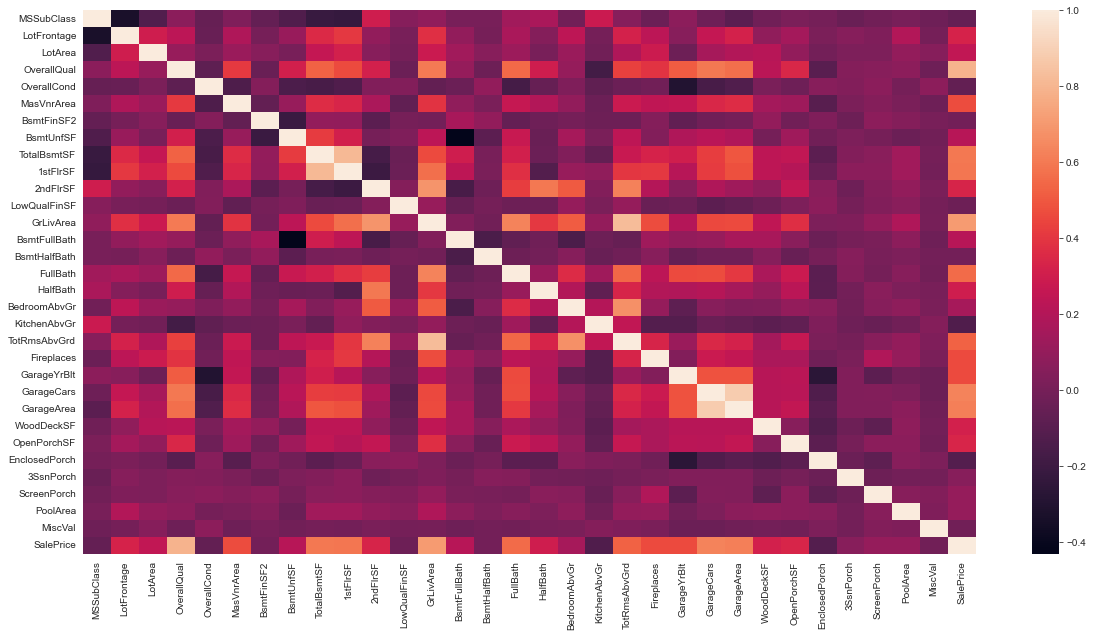

In [46]:
sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size
sns.heatmap(df1.corr())
plt.savefig('heatmap.jpg')

In [47]:
# holding dependent and independent columns in a variable so it will make it easy to plot data in figure
dep = df1['SalePrice']
i = df1.columns
ind = i[0:-1]

In [48]:
# checking length of the independent variable
len(ind)

31

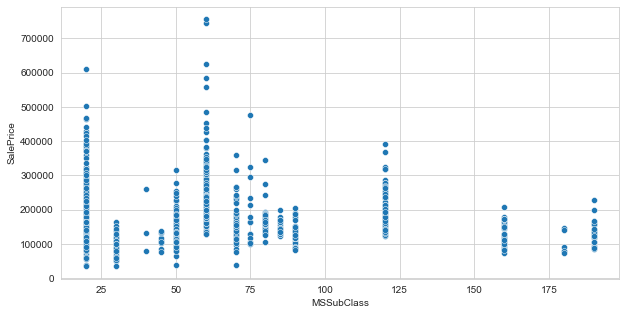

In [49]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[0], dep, data = df1)
plt.savefig('1.jpg')

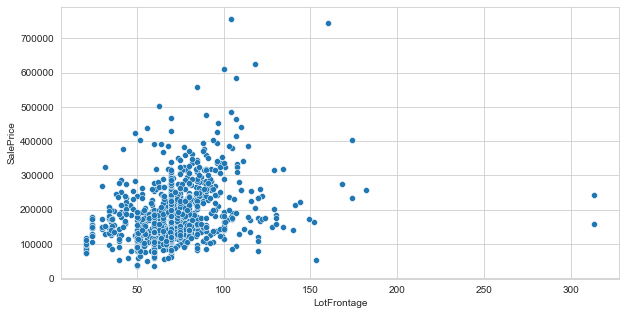

In [50]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[1], dep, data = df1)
plt.savefig('2.jpg')

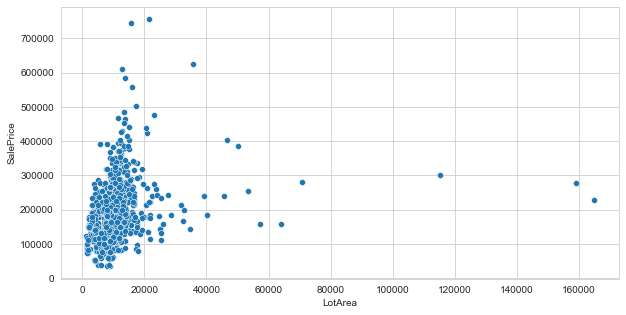

In [51]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[2], dep, data = df1)
plt.savefig('3.jpg')

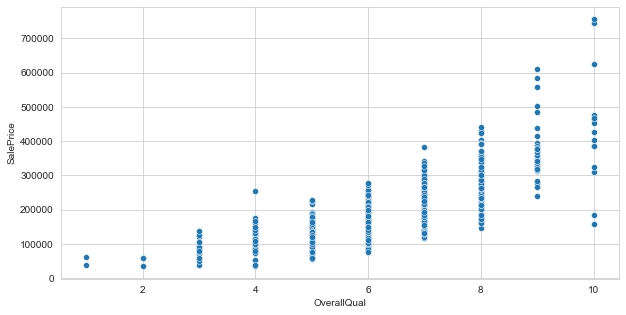

In [52]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[3], dep, data = df1)
plt.savefig('4.jpg')

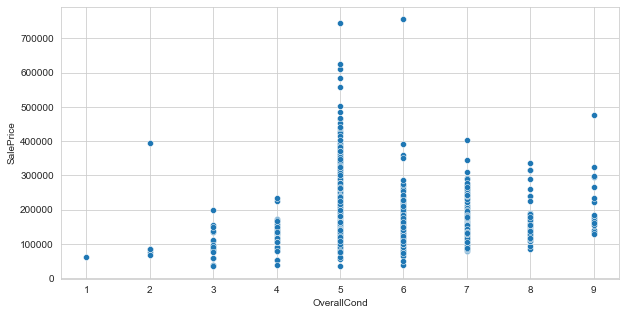

In [53]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[4], dep, data = df1)
plt.savefig('5.jpg')

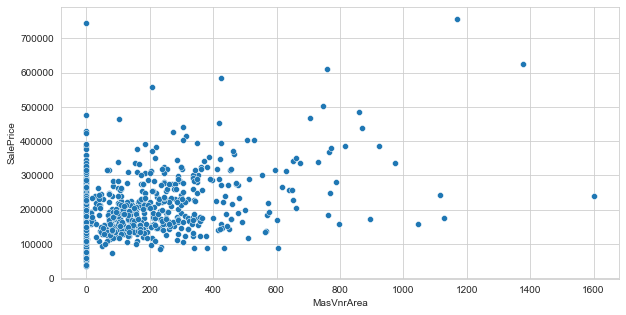

In [54]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[5], dep, data = df1)
plt.savefig('6.jpg')

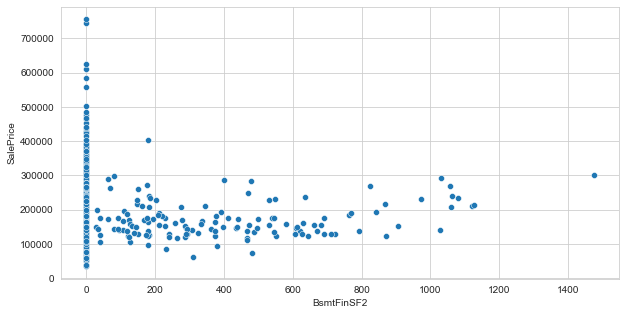

In [55]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[6], dep, data = df1)
plt.savefig('7.jpg')

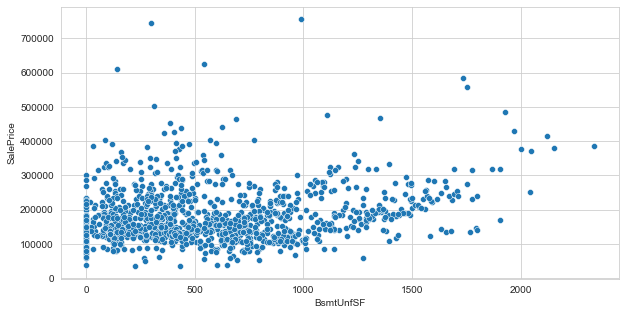

In [56]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[7], dep, data = df1)
plt.savefig('8.jpg')

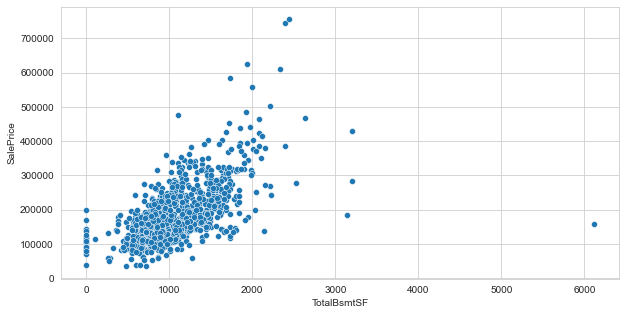

In [57]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[8], dep, data = df1)
plt.savefig('9.jpg')

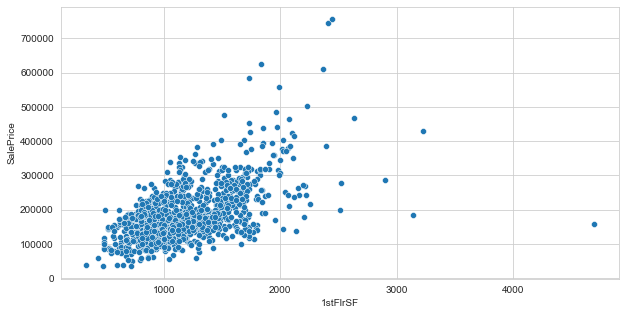

In [58]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[9], dep, data = df1)
plt.savefig('10.jpg')

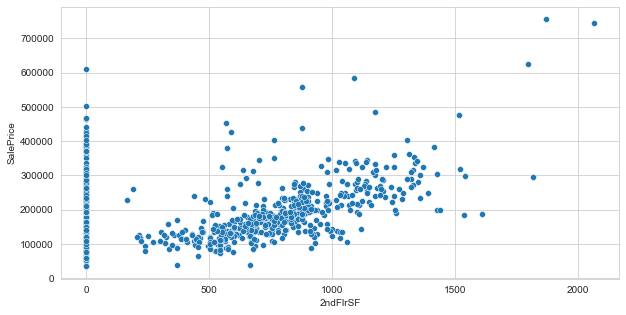

In [59]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[10], dep, data = df1)
plt.savefig('11.jpg')

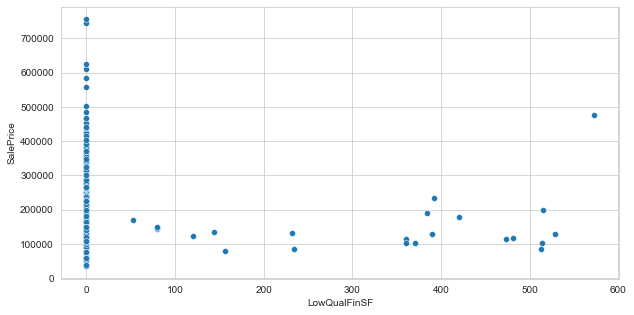

In [60]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[11], dep, data = df1)
plt.savefig('12.jpg')

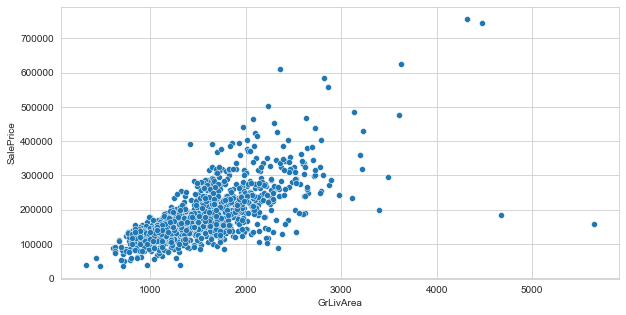

In [61]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[12], dep, data = df1)
plt.savefig('13.jpg')

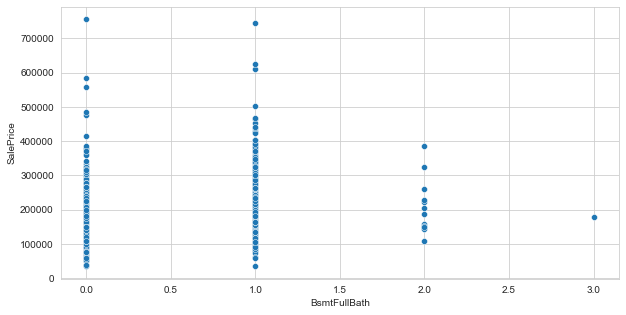

In [62]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[13], dep, data = df1)
plt.savefig('14.jpg')

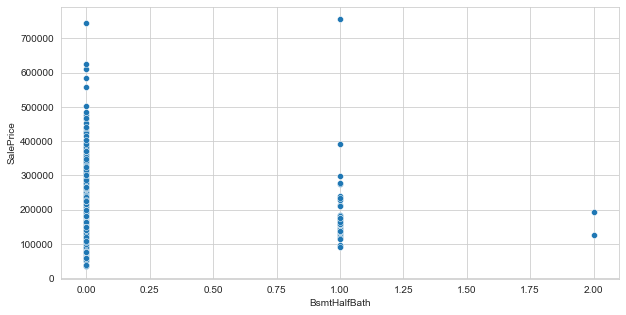

In [63]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[14], dep, data = df1)
plt.savefig('15.jpg')

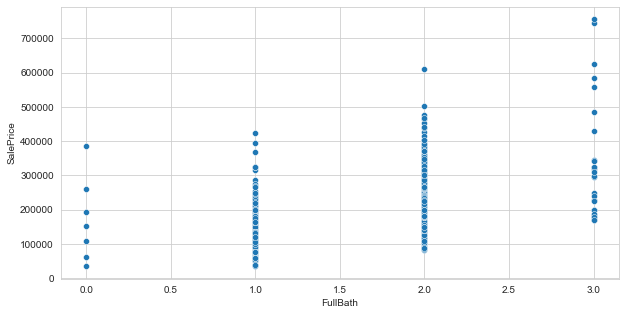

In [64]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[15], dep, data = df1)
plt.savefig('16.jpg')

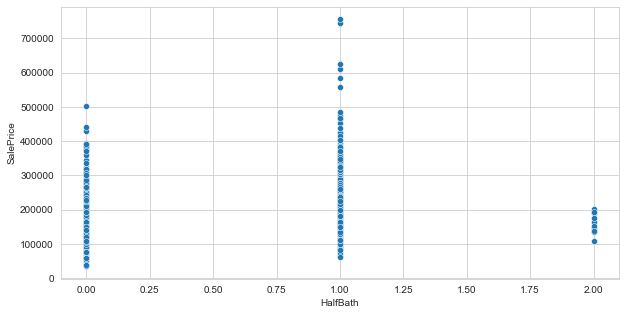

In [65]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[16], dep, data = df1)
plt.savefig('17.jpg')

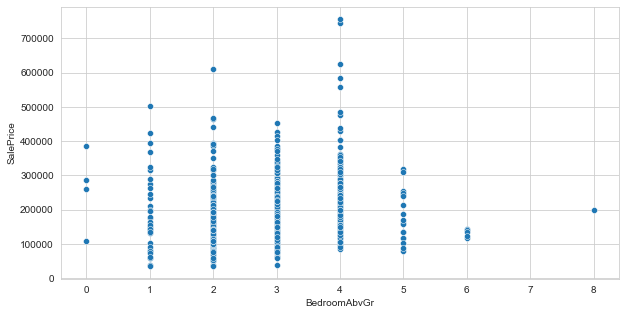

In [66]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[17], dep, data = df1)
plt.savefig('18.jpg')

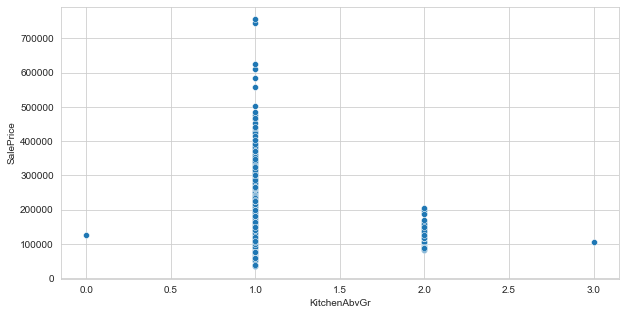

In [67]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[18], dep, data = df1)
plt.savefig('19.jpg')

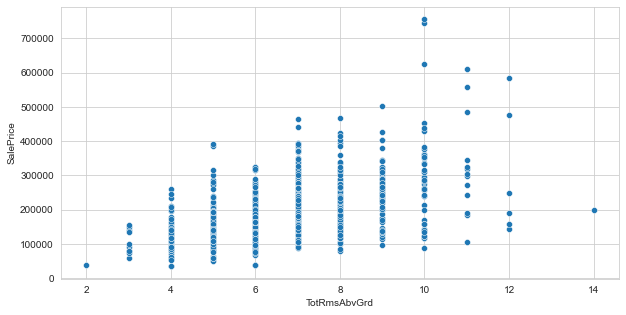

In [68]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[19], dep, data = df1)
plt.savefig('20.jpg')

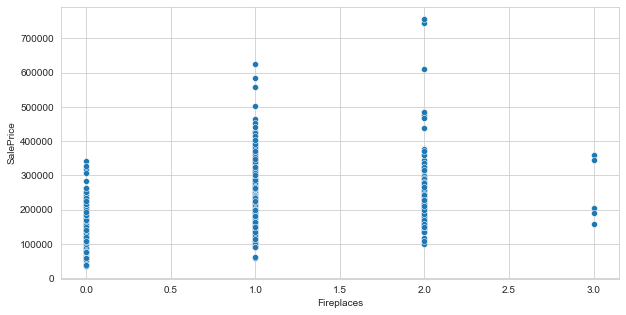

In [69]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[20], dep, data = df1)
plt.savefig('21.jpg')

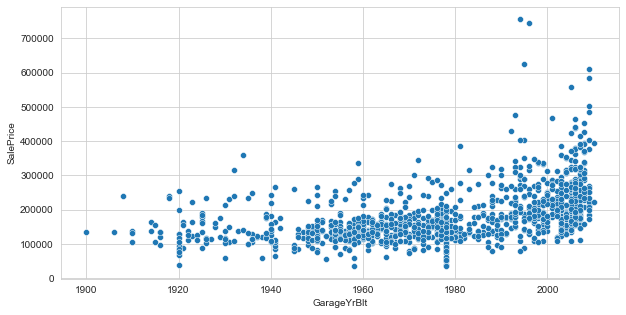

In [70]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[21], dep, data = df1)
plt.savefig('22.jpg')

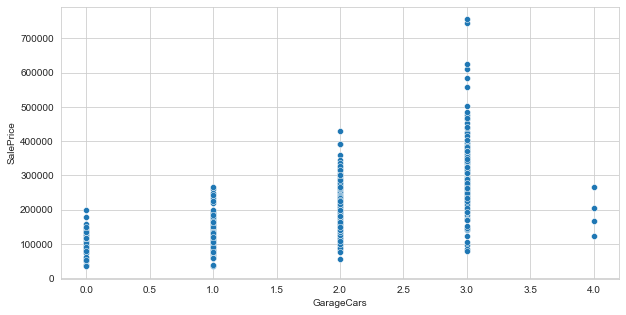

In [71]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[22], dep, data = df1)
plt.savefig('23.jpg')

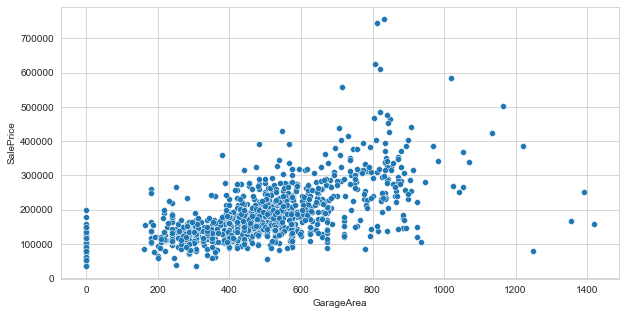

In [72]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[23], dep, data = df1)
plt.savefig('24.jpg')

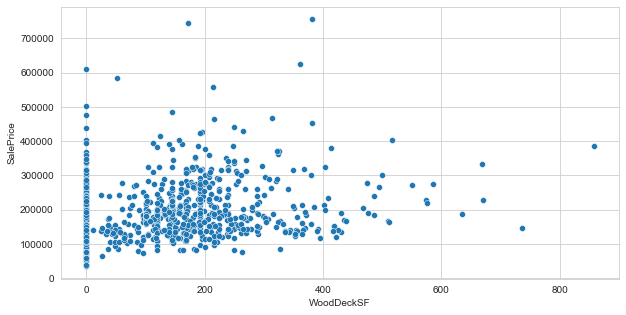

In [73]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[24], dep, data = df1)
plt.savefig('25.jpg')

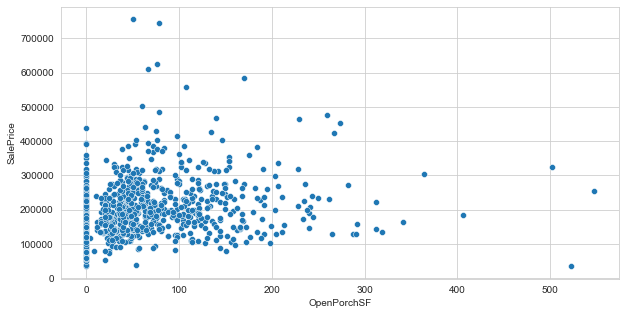

In [74]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[25], dep, data = df1)
plt.savefig('26.jpg')

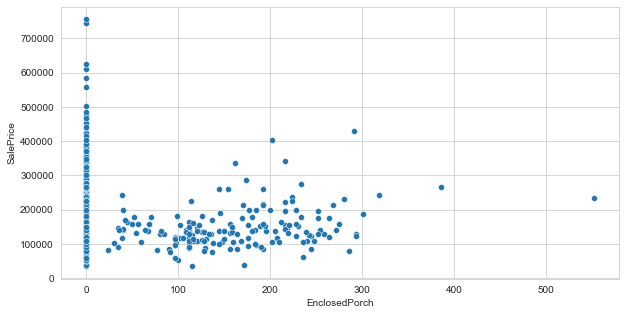

In [75]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[26], dep, data = df1)
plt.savefig('27.jpg')

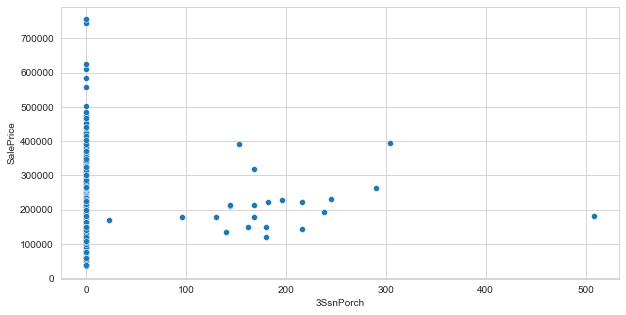

In [76]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[27], dep, data = df1)
plt.savefig('28.jpg')

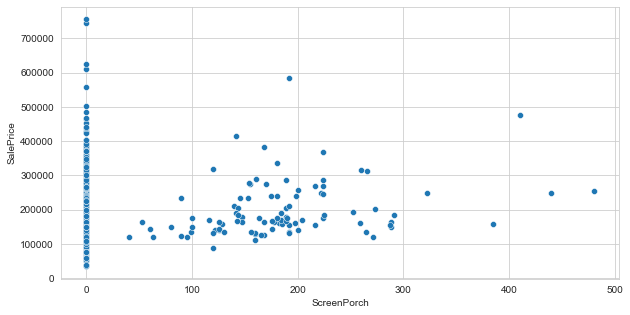

In [77]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[28], dep, data = df1)
plt.savefig('29.jpg')

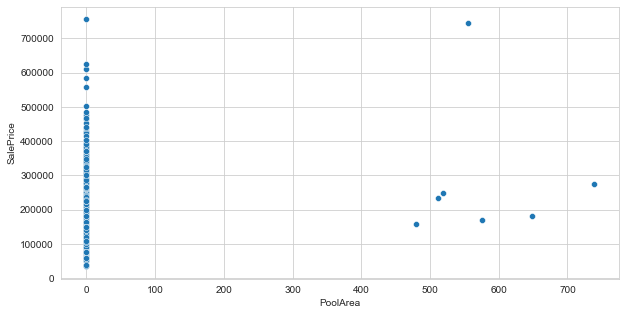

In [78]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[29], dep, data = df1)
plt.savefig('30.jpg')

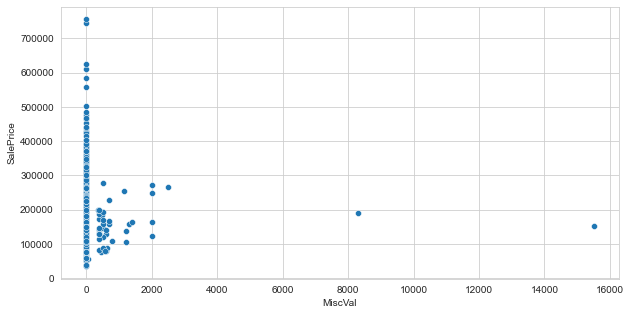

In [79]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(ind[30], dep, data = df1)
plt.savefig('31.jpg')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

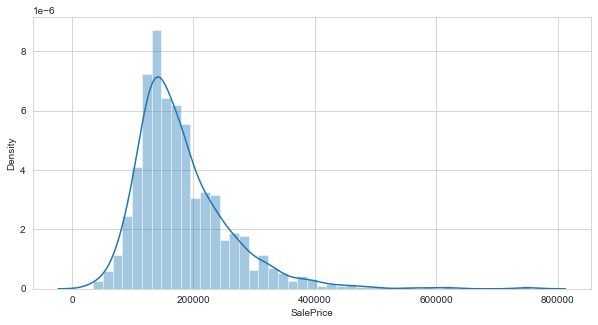

In [80]:
# checking the ditribution of SalePrice
sns.distplot(df1['SalePrice'])

In [81]:
# from here we can see that the most of the house prices lies below 2 lakh dollar